___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***".
In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

Customer Personality Analysis is a detailed analysis of a company’s ideal customers.
It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# About the dataset 

PEOPLE
- ID: Customer's unique identifier.
- Year_Birth: Customer's birth year.
- Education: Customer's education level.
- Marital_Status: Customer's marital status.
- Income: Customer's yearly household income.
- Kidhome: Number of children in customer's household.
- Teenhome: Number of teenagers in customer's household.
- Dt_Customer: Date of customer's enrollment with the company.
- Recency: Number of days since customer's last purchase.
- Complain: 1 if customer complained in the last 2 years, 0 otherwise.

PRODUCTS

- MntWines: Amount spent on wine in last 2 years.
- MntFruits: Amount spent on fruits in last 2 years.
- MntMeatProducts: Amount spent on meat in last 2 years.
- MntFishProducts: Amount spent on fish in last 2 years.
- MntSweetProducts: Amount spent on sweets in last 2 years.
- MntGoldProds: Amount spent on gold in last 2 years.

PROMOTION

- NumDealsPurchases: Number of purchases made with a discount.
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

PLACE

- NumWebPurchases: Number of purchases made through the company’s web site.
- NumCatalogPurchases: Number of purchases made using a catalogue.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [2]:
df0 = pd.read_csv("marketing_campaign.csv", sep=";")
df = df0.copy()

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240,"5,592.16","3,246.66",0,"2,828.25","5,458.50","8,427.75",11191
Year_Birth,2240,"1,968.81",11.98,1893,1959,1970,1977,1996
Income,2216,"52,247.25","25,173.08",1730,35303,"51,381.50",68522,666666
Kidhome,2240,0.44,0.54,0,0,0,1,2
Teenhome,2240,0.51,0.54,0,0,0,1,2
Recency,2240,49.11,28.96,0,24,49,74,99
MntWines,2240,303.94,336.60,0,23.75,173.50,504.25,1493
MntFruits,2240,26.30,39.77,0,1,8,33,199
MntMeatProducts,2240,166.95,225.72,0,16,67,232,1725
MntFishProducts,2240,37.53,54.63,0,3,12,50,259


In [6]:
df.describe(include="object").T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,2012-08-31,12


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(2240, 29)

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
df.columns = df.columns.str.lower()

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

### response 

In [12]:
df["response"].value_counts()

response
0    1906
1     334
Name: count, dtype: int64

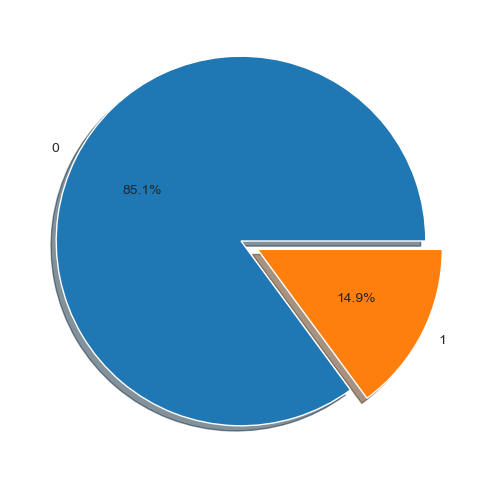

In [13]:
df["response"].value_counts().plot(kind="pie", autopct="%1.1f%%", explode=(0, 0.1), shadow=True, figsize=(6,6))
plt.ylabel("");

In [14]:
# df.drop(columns=["response"], inplace=True)

### complain 

In [15]:
df["complain"].value_counts()

complain
0    2219
1      21
Name: count, dtype: int64

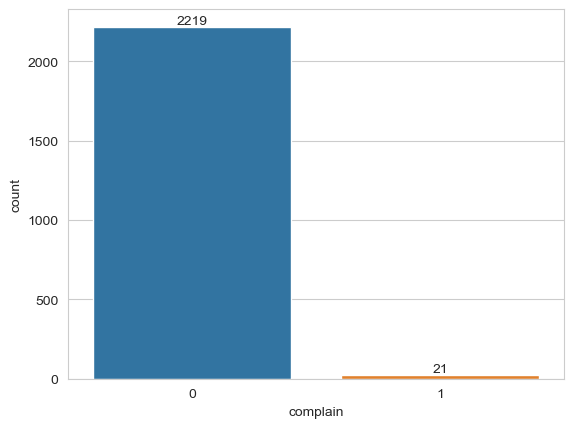

In [16]:
ax = sns.countplot(data=df, x="complain")
ax.bar_label(ax.containers[0]);
plt.show()

In [17]:
df.drop(columns=["complain"], inplace=True)

### id

In [18]:
df.id.nunique()

2240

In [19]:
# since this is the unique value given for each customer, this column will be dropped. 

In [20]:
df.drop(columns=["id"], inplace=True)

###  z_costcontact & z_revenue

In [21]:
df["z_costcontact"].value_counts()

z_costcontact
3    2240
Name: count, dtype: int64

In [22]:
df["z_revenue"].value_counts()

z_revenue
11    2240
Name: count, dtype: int64

In [23]:
# since there is only one unique value in these columns, they are just nothing for machine learning.

In [24]:
df.drop(columns=["z_costcontact", "z_revenue"], inplace=True)

### income 

In [25]:
df["income"].value_counts()

income
7500     12
35860     4
37760     3
83844     3
63841     3
         ..
40760     1
41452     1
6835      1
33622     1
52869     1
Name: count, Length: 1974, dtype: int64

In [26]:
df[df['income'].isna()]

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response
10,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,...,1,0,2,7,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,...,27,0,0,1,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,...,1,3,4,2,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,...,2,1,4,6,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,...,2,0,3,6,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,...,3,0,3,8,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,...,7,2,8,9,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,...,1,0,2,7,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,...,2,4,8,1,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,...,6,1,7,6,0,0,0,0,0,0


In [27]:
df.groupby(["marital_status", "education"])[["income"]].mean()

income
marital_status education           
Absurd         Graduation     79244
               Master         65487
Alone          Graduation     34176
               Master         61331
               PhD            35860
Divorced       2n Cycle   49,395.13
               Basic           9548
               Graduation 54,526.04
               Master     50,331.95
               PhD        53,096.62
Married        2n Cycle   46,201.10
               Basic      21,960.50
               Graduation 50,800.26
               Master     53,286.03
               PhD        58,138.03
Single         2n Cycle   53,673.94
               Basic      18,238.67
               Graduation 51,322.18
               Master     53,530.56
               PhD        53,314.61
Together       2n Cycle   44,736.41
               Basic      21,240.07
               Graduation 55,758.48
               Master     52,109.01
               PhD        56,041.42
Widow          2n Cycle   51,392.20
               Basic          22123
               Graduation 54,976.66
               Master     58,401.55
               PhD        60,288.08
YOLO           PhD            48432

In [28]:
df['income'] = df.groupby(["marital_status", "education"])['income'].transform(lambda x: x.fillna(x.mean()))

In [29]:
df.isnull().sum().any()

False

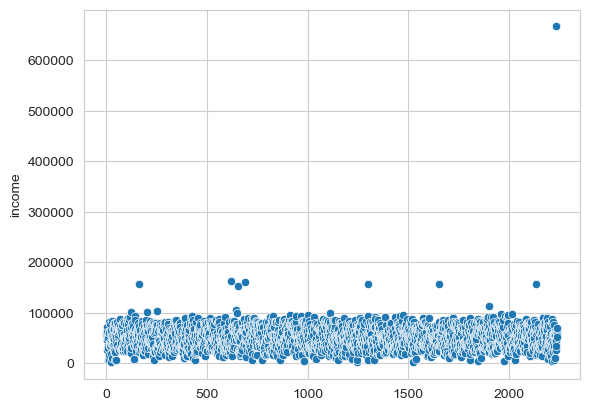

In [30]:
sns.scatterplot(df["income"]);

In [31]:
df = df[df["income"]<=200000]

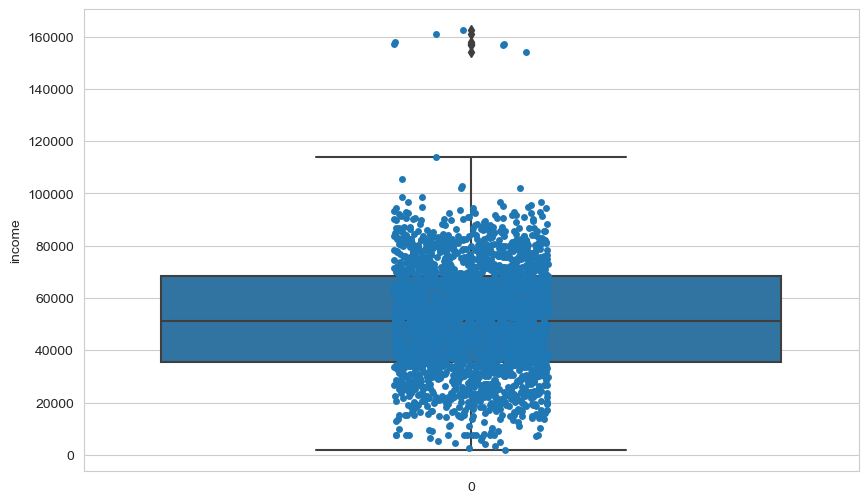

In [32]:
plt.figure(figsize = (10,6))

plt.subplot()
sns.boxplot(df["income"])

plt.subplot()
sns.stripplot(df["income"])

plt.show()

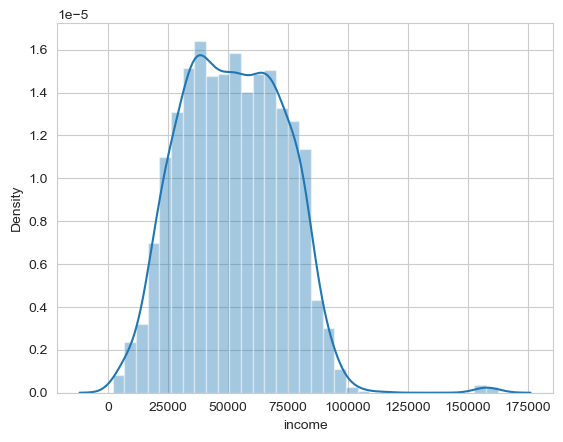

In [33]:
sns.distplot(df["income"]);

### education

In [34]:
df["education"].value_counts()

education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [35]:
df["education"] = df["education"].replace(['Basic'], 'Under Graduate') 
df["education"] = df["education"].replace(['PhD', 'Master', '2n Cycle'], 'Post Graduate') 
df["education"] = df["education"].replace(['Graduation'], 'Graduate') 

In [36]:
df["education"].value_counts()

education
Graduate          1126
Post Graduate     1059
Under Graduate      54
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

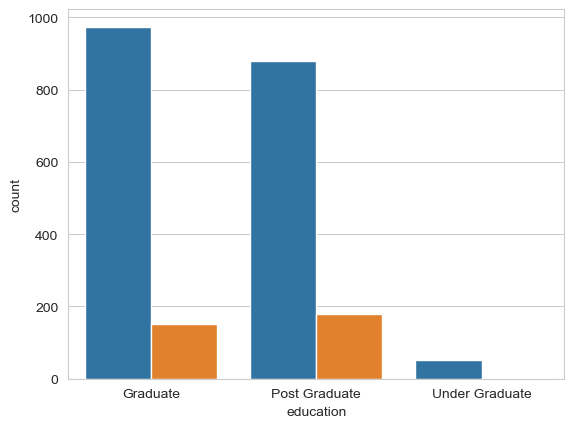

In [37]:
ax = sns.countplot(data=df, x="education", hue="response")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

###  marital_status

In [ ]:
df['marital_status'].value_counts()

In [38]:
df[df["marital_status"]=="Absurd"].T

,2093,2134
year_birth,1993,1957
education,Graduate,Post Graduate
marital_status,Absurd,Absurd
income,79244,65487
kidhome,0,0
teenhome,0,0
dt_customer,2012-12-19,2014-01-10
recency,58,48
mntwines,471,240
mntfruits,102,67


In [39]:
df[df["marital_status"]=="YOLO"].T

,2177,2202
year_birth,1973,1973
education,Post Graduate,Post Graduate
marital_status,YOLO,YOLO
income,48432,48432
kidhome,0,0
teenhome,1,1
dt_customer,2012-10-18,2012-10-18
recency,3,3
mntwines,322,322
mntfruits,3,3


In [40]:
df[df["marital_status"]=="Alone"].T

,131,138,153
year_birth,1958,1973,1988
education,Post Graduate,Post Graduate,Graduate
marital_status,Alone,Alone,Alone
income,61331,35860,34176
kidhome,1,1,1
teenhome,1,1,0
dt_customer,2013-03-10,2014-05-19,2014-05-12
recency,42,37,12
mntwines,534,15,5
mntfruits,5,0,7


In [41]:
df['marital_status'] = df['marital_status'].replace(['Married', 'Together'],'Relationship')
df['marital_status'] = df['marital_status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [42]:
df["marital_status"].value_counts()

marital_status
Relationship    1443
Single           796
Name: count, dtype: int64

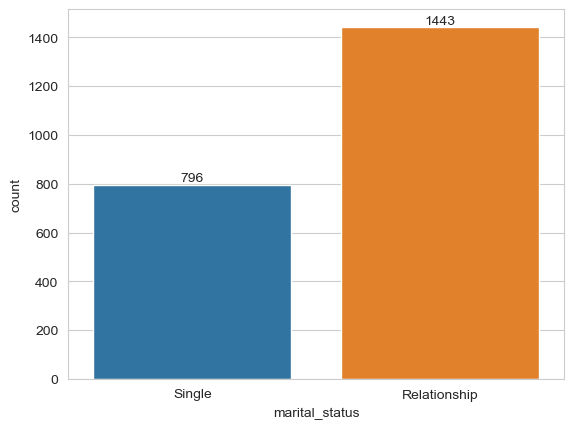

In [43]:
ax = sns.countplot(data=df, x="marital_status")
ax.bar_label(ax.containers[0]);
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

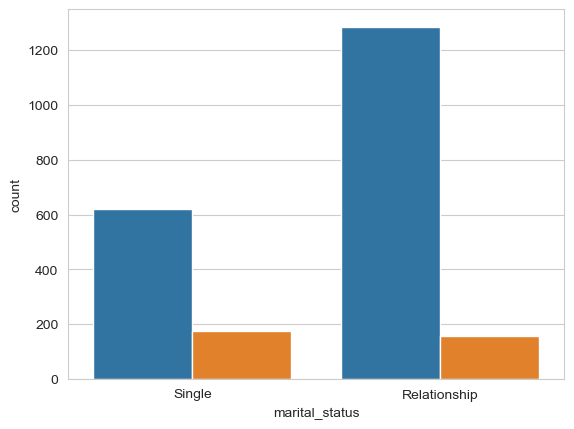

In [44]:
ax = sns.countplot(data=df, x="marital_status", hue="response")

for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

### kidhome & teenhome 

In [45]:
df['kidhome'].value_counts()

kidhome
0    1293
1     898
2      48
Name: count, dtype: int64

In [46]:
df['teenhome'].value_counts()

teenhome
0    1157
1    1030
2      52
Name: count, dtype: int64

In [47]:
df["total_children"] = df['kidhome'] + df['teenhome']

In [48]:
df["family_size"] = df["total_children"] + df["marital_status"].replace({"Single": 1, "Relationship":2})

AttributeError: 'numpy.int64' object has no attribute 'startswith'

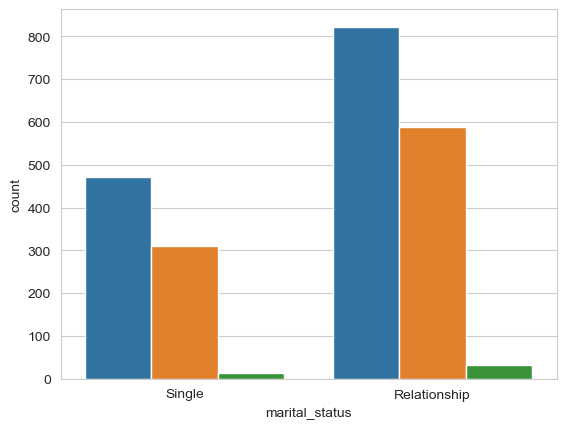

In [49]:
ax = sns.countplot(data=df, x="marital_status", hue="kidhome")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

In [ ]:
ax = sns.countplot(data=df, x="marital_status", hue="teenhome")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

### year_birth 

In [50]:
df.dt_customer.max()

'2014-06-29'

In [51]:
df["age"] = 2014 - df["year_birth"]

In [52]:
df[["age", "year_birth"]] 

,age,year_birth
0,57,1957
1,60,1954
2,49,1965
3,30,1984
4,33,1981
...,...,...
2235,47,1967
2236,68,1946
2237,33,1981
2238,58,1956


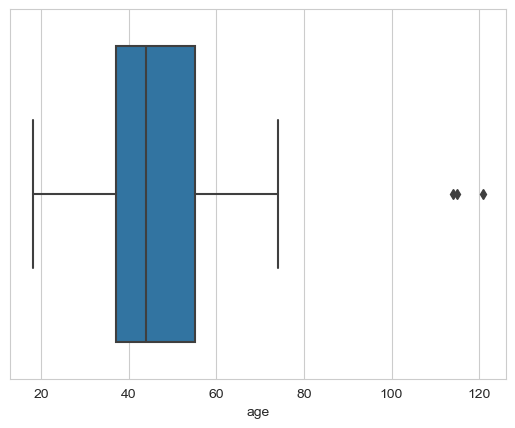

In [53]:
sns.boxplot(data=df, x="age");

In [54]:
df = df[df.age <= 100]

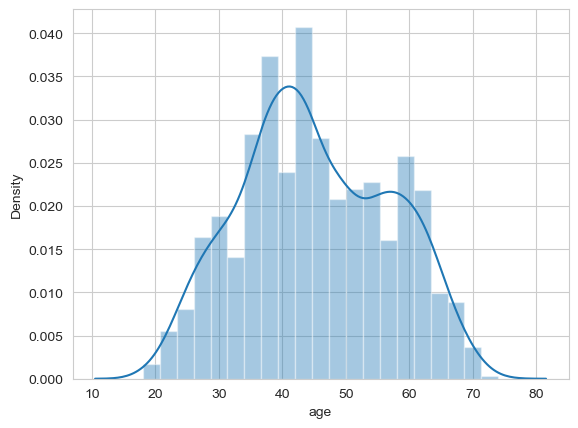

In [55]:
sns.distplot(df["age"]);

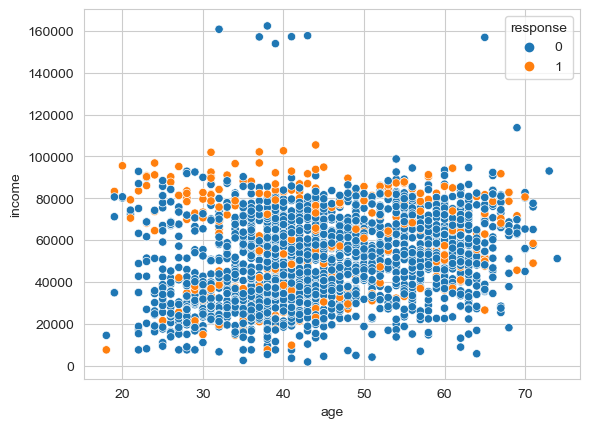

In [56]:
sns.scatterplot(data=df, x="age", y="income", hue="response");

In [57]:
df.drop(columns=["year_birth"], inplace=True)

### dt_customer 

In [58]:
df["dt_customer"] = pd.to_datetime(df.dt_customer)

In [59]:
last_date = pd.to_datetime('2014-12-31')

In [60]:
df["days_since_enrollment"] = (last_date - df['dt_customer']).dt.days

In [61]:
df["days_since_enrollment"].value_counts().sort_index()

days_since_enrollment
185    2
186    3
187    3
188    4
189    5
      ..
880    5
881    3
882    4
883    1
884    1
Name: count, Length: 663, dtype: int64

In [62]:
df.drop(columns=["dt_customer"], inplace=True)

### recency 

In [63]:
df["recency"].value_counts().sort_index()

recency
0     28
1     24
2     28
3     29
4     27
      ..
95    19
96    25
97    20
98    22
99    16
Name: count, Length: 100, dtype: int64

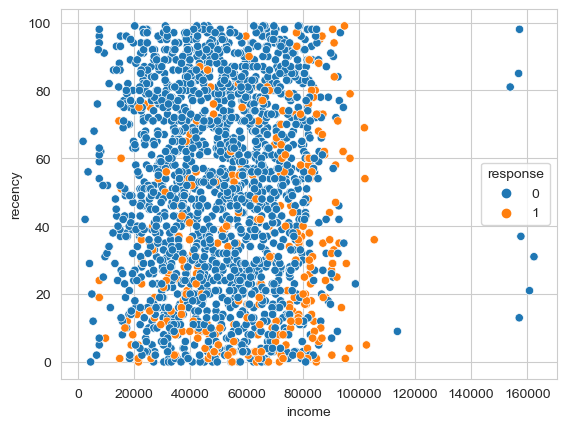

In [64]:
sns.scatterplot(data=df, x="income", y="recency", hue="response");

### acceptedcmp1 & acceptedcmp2 & acceptedcmp3 & acceptedcmp4 & acceptedcmp5 

In [65]:
df["total_acceptedcmp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [66]:
df["total_acceptedcmp"].value_counts() 

total_acceptedcmp
0    1774
1     324
2      83
3      44
4      11
Name: count, dtype: int64

In [67]:
df.drop(columns=["acceptedcmp1", "acceptedcmp2", "acceptedcmp3", "acceptedcmp4", "acceptedcmp5"], inplace=True)

### mntwines & mntfruits & mntmeatproducts & mntfishproducts & mntsweetproducts & mntgoldprods  

In [68]:
df["spent"] = df["mntwines"] + df["mntfruits"] + df["mntmeatproducts"] + df["mntfishproducts"] + df["mntsweetproducts"] + df["mntgoldprods"]

In [69]:
df["spent"].value_counts()

spent
46      19
22      17
57      16
44      15
55      15
        ..
108      1
1493     1
936      1
528      1
843      1
Name: count, Length: 1054, dtype: int64

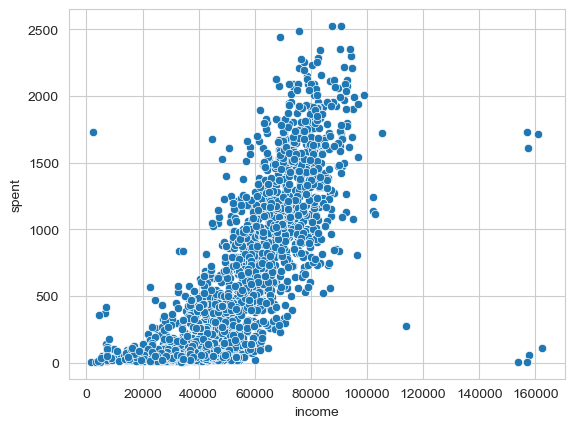

In [70]:
sns.scatterplot(data=df, x="income", y="spent");

### numdealspurchases & numwebpurchases & numcatalogpurchases & numstorepurchases  

In [71]:
df["numdealspurchases"].nunique()

15

In [72]:
df["numwebpurchases"].nunique()

15

In [73]:
df["numcatalogpurchases"].nunique()

14

In [74]:
df["numstorepurchases"].nunique()

14

In [75]:
df['numtotalpurchases'] = df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases'] + df['numdealspurchases']
df['numtotalpurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

### numwebvisitsmonth 

In [76]:
df["numwebvisitsmonth"].value_counts()

numwebvisitsmonth
7     393
8     342
6     339
5     280
4     217
3     205
2     202
1     152
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: count, dtype: int64

In [77]:
df.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'response', 'total_children',
       'family_size', 'age', 'days_since_enrollment', 'total_acceptedcmp',
       'spent', 'numtotalpurchases'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2236 non-null   object 
 1   marital_status         2236 non-null   object 
 2   income                 2236 non-null   float64
 3   kidhome                2236 non-null   int64  
 4   teenhome               2236 non-null   int64  
 5   recency                2236 non-null   int64  
 6   mntwines               2236 non-null   int64  
 7   mntfruits              2236 non-null   int64  
 8   mntmeatproducts        2236 non-null   int64  
 9   mntfishproducts        2236 non-null   int64  
 10  mntsweetproducts       2236 non-null   int64  
 11  mntgoldprods           2236 non-null   int64  
 12  numdealspurchases      2236 non-null   int64  
 13  numwebpurchases        2236 non-null   int64  
 14  numcatalogpurchases    2236 non-null   int64  
 15  numstorep

In [79]:
target = df[["response"]]

In [80]:
object_df = df.select_dtypes(include="object")

In [81]:
df.drop(columns=["response"], inplace=True)

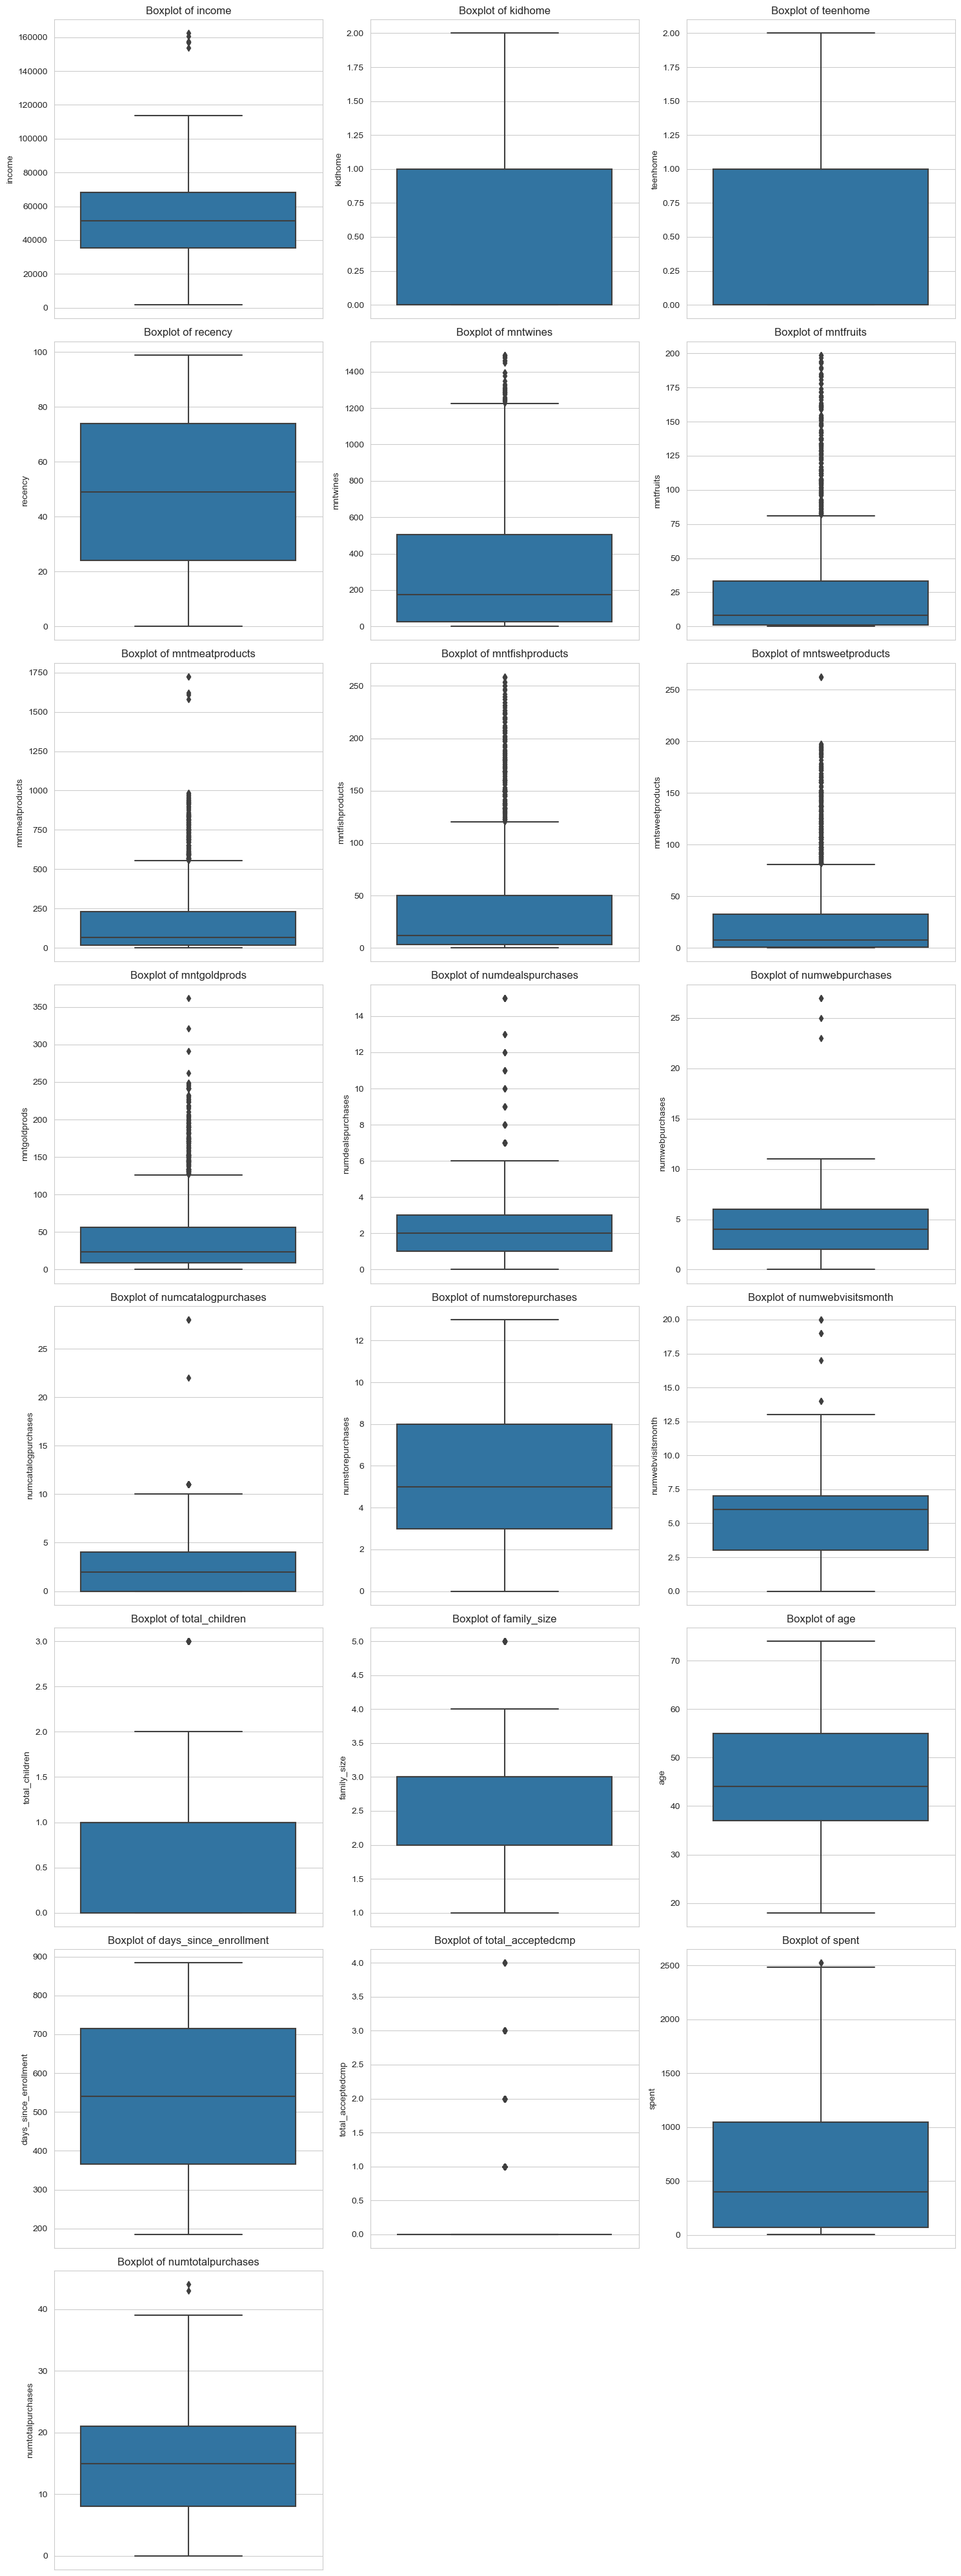

In [82]:
# Plotting box plots for all numeric columns in a 3-column layout
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [83]:
numeric_df = df.select_dtypes(include="number")

In [84]:
numeric_df.shape

(2236, 22)

In [85]:
scaler = StandardScaler()

In [86]:
scaled_df0 = scaler.fit_transform(numeric_df)

In [87]:
scaled_df = pd.DataFrame(scaled_df0, columns=numeric_df.columns)
scaled_df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,total_children,family_size,age,days_since_enrollment,total_acceptedcmp,spent,numtotalpurchases
0,0.29,-0.82,-0.93,0.31,0.98,1.55,1.68,2.46,1.48,0.85,...,2.51,-0.55,0.69,-1.26,-1.76,1.02,1.53,-0.44,1.68,1.32
1,-0.26,1.03,0.91,-0.38,-0.87,-0.64,-0.71,-0.65,-0.63,-0.73,...,-0.57,-1.17,-0.13,1.40,0.45,1.27,-1.19,-0.44,-0.96,-1.16
2,0.92,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,...,-0.23,1.29,-0.54,-1.26,-0.66,0.33,-0.21,-0.44,0.28,0.80
3,-1.18,1.03,-0.93,-0.80,-0.87,-0.56,-0.65,-0.50,-0.58,-0.75,...,-0.91,-0.55,0.28,0.07,0.45,-1.29,-1.06,-0.44,-0.92,-0.90
4,0.30,1.03,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,...,0.12,0.06,-0.13,0.07,0.45,-1.03,-0.95,-0.44,-0.31,0.54


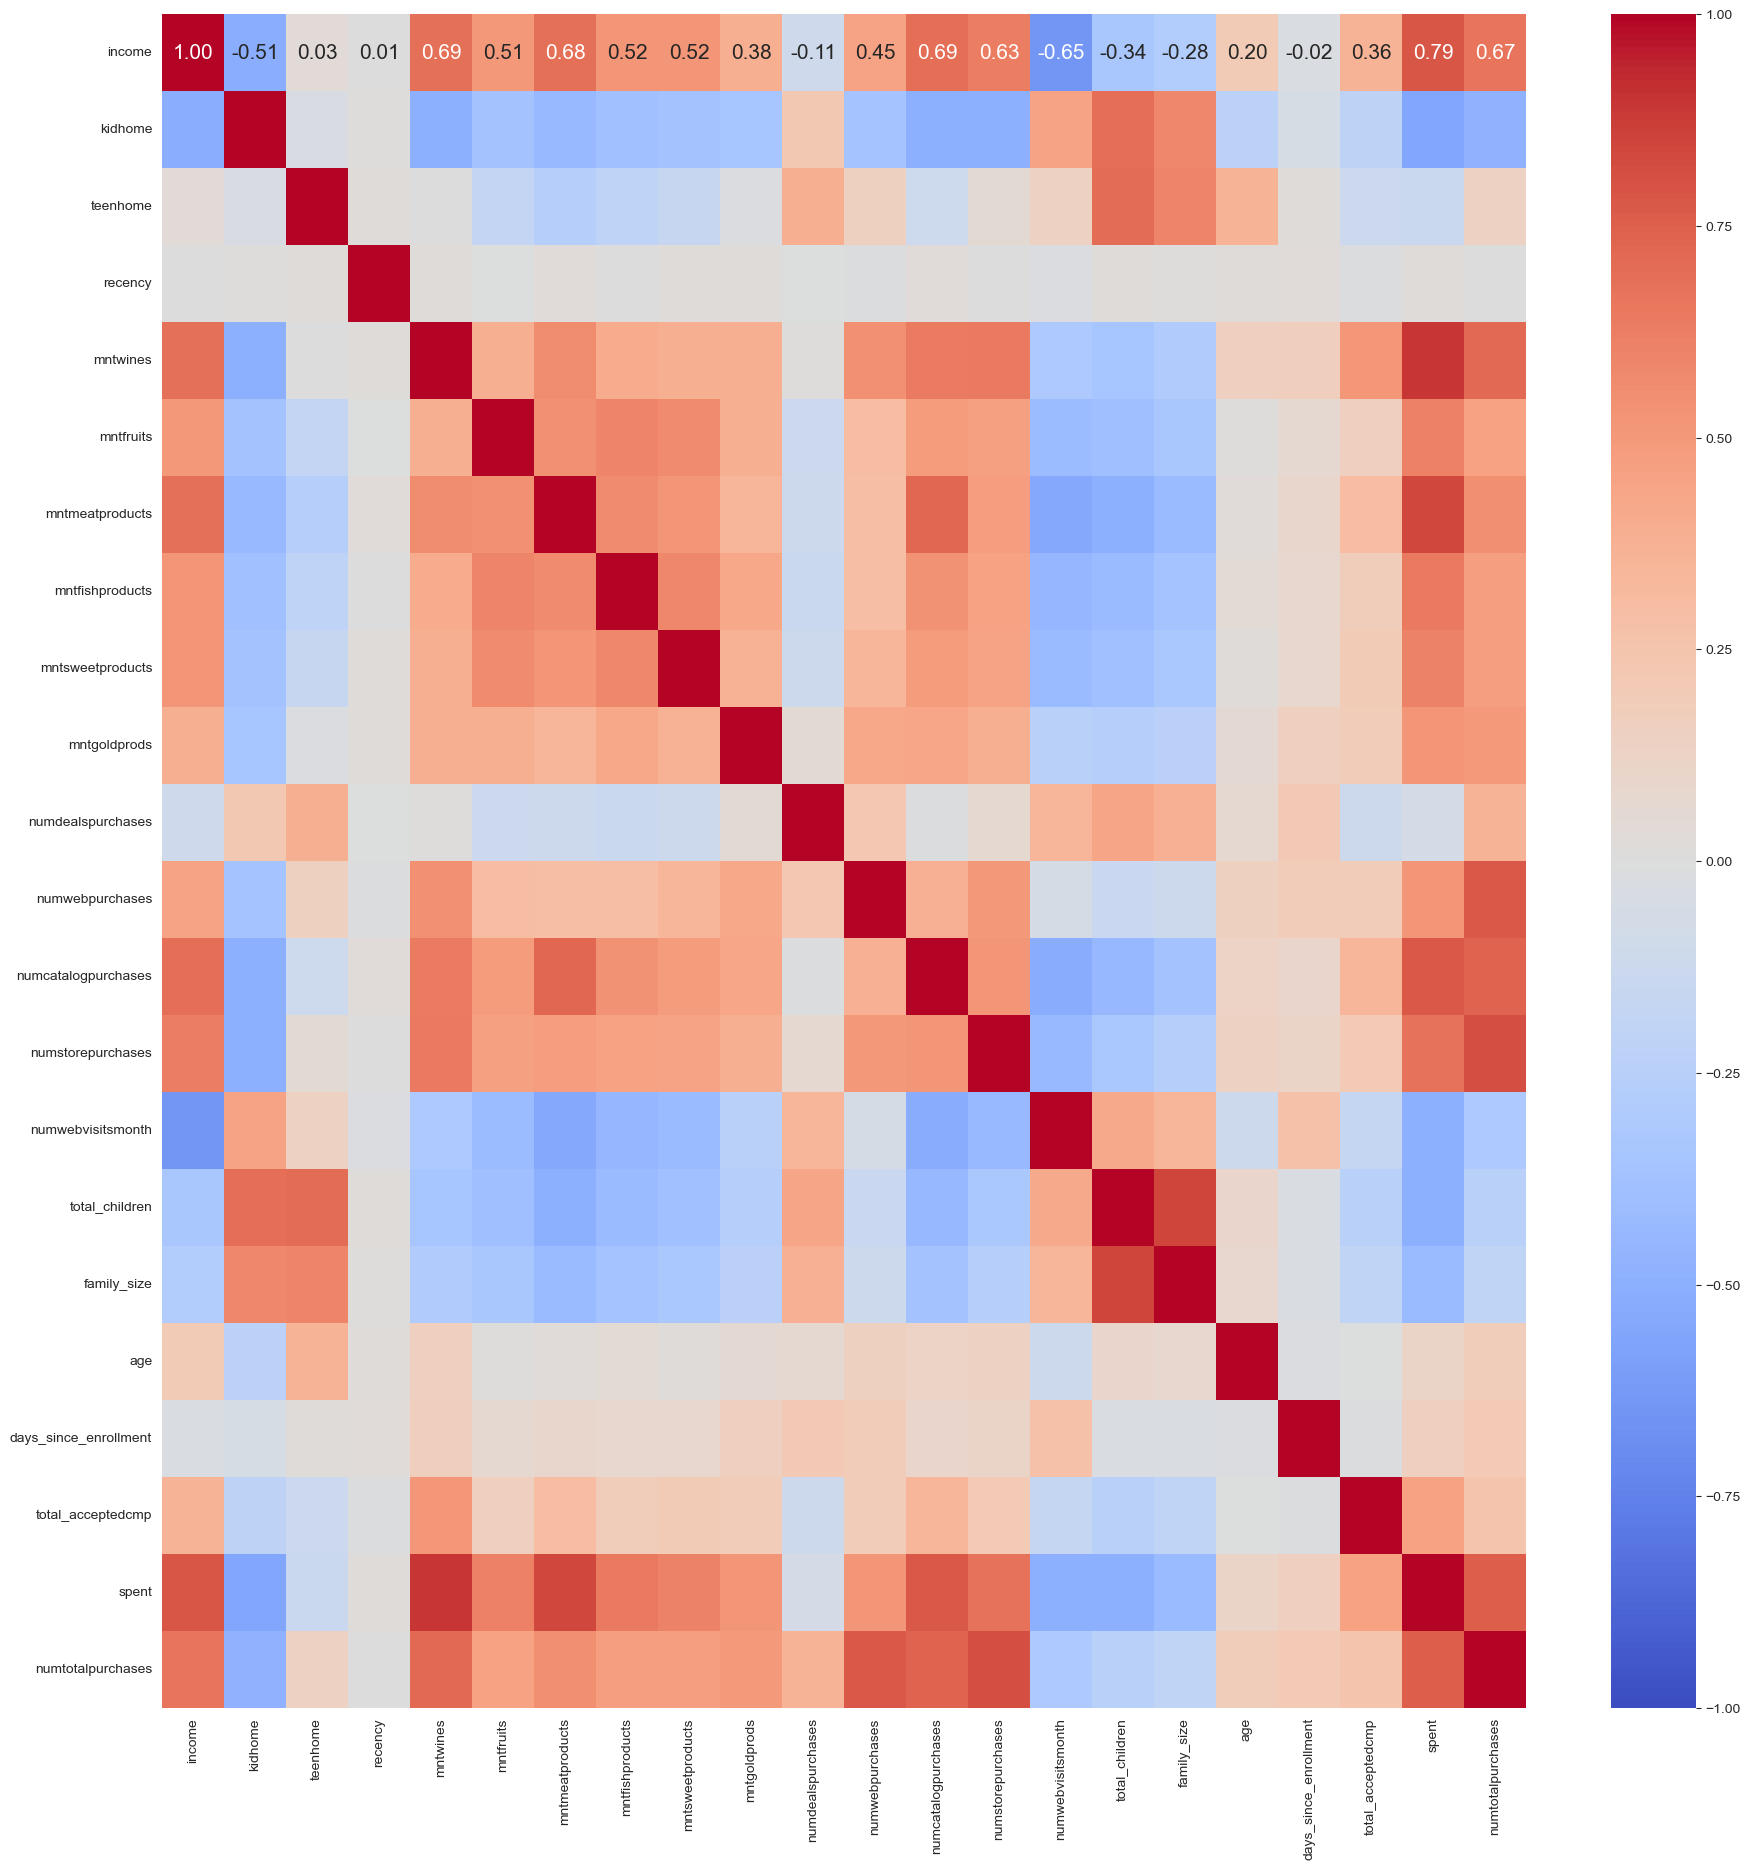

In [88]:
plt.figure(figsize=(22, 22))
sns.heatmap(scaled_df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 15}, fmt='.2f', cmap="coolwarm");

In [89]:
# PCA algorithm will work much better if there are meaningful correlations between features.
# PCA also takes care of the multicollinearity issue.
# High corr with each other or features with a meaningful corr relationship are more intensely
# combined in the same component.
# In all the new componets we will achieve in PCA, more or less, all the features will surely contribute.

In [90]:
pca = PCA(n_components=3)

In [91]:
principal_components = pca.fit_transform(scaled_df0)

# With the fit method, eigen vectors are determined for each component as much as
# the number of feature/rows in our data, whichever is less. With the transform method,
# the eigenvectors and the feature values of each observation are multiplied and
# added together to obtain components.
# The number of components we specify as n_componenets is returned.

In [92]:
component_df = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_component"])
component_df

# We named our components to make them more readable.

,first_component,second_component,third_component
0,4.74,-0.12,2.04
1,-3.10,0.17,-2.12
2,2.30,-0.66,0.03
3,-2.86,-1.46,0.25
4,-0.35,0.22,0.40
...,...,...,...
2231,2.60,1.59,0.46
2232,-2.13,4.63,-1.46
2233,2.39,-1.62,0.32
2234,1.96,1.25,-1.76


In [93]:
#Eigenvectors
pca.components_

# componenet_ returns the number of eigenvectors we specify in n_componenets.

array([[ 0.28208856, -0.23581757, -0.06487479,  0.00397879,  0.26847189,
         0.23132805,  0.27478166,  0.24043207,  0.23127609,  0.19350547,
        -0.04338351,  0.19098621,  0.28056835,  0.25450089, -0.20959857,
        -0.21577852, -0.18875548,  0.04502965,  0.03974734,  0.14311336,
         0.32288818,  0.27284197],
       [ 0.08029912,  0.0668378 ,  0.45720769,  0.01439882,  0.14510697,
        -0.0509774 , -0.06439771, -0.06042083, -0.03492865,  0.09403701,
         0.42331515,  0.28453852,  0.04444482,  0.15968946,  0.15302093,
         0.37887173,  0.35846559,  0.20774852,  0.1491313 , -0.02016653,
         0.05388942,  0.29414632],
       [-0.24247626,  0.10729214, -0.31510477, -0.02737353,  0.03279609,
         0.01676826, -0.01191029,  0.01598764,  0.01889752,  0.15414741,
         0.24928185,  0.18976185, -0.03427491, -0.02113008,  0.44135083,
        -0.15133725, -0.16230659, -0.39350247,  0.54048725,  0.00722455,
         0.03106391,  0.10946941]])

In [94]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

# we draw our first eigenvector. Returns the total number of features.
# These values show how much each feature contribute to the first component we acquire.

array([ 0.28208856, -0.23581757, -0.06487479,  0.00397879,  0.26847189,
        0.23132805,  0.27478166,  0.24043207,  0.23127609,  0.19350547,
       -0.04338351,  0.19098621,  0.28056835,  0.25450089, -0.20959857,
       -0.21577852, -0.18875548,  0.04502965,  0.03974734,  0.14311336,
        0.32288818,  0.27284197])

In [95]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([ 0.08029912,  0.0668378 ,  0.45720769,  0.01439882,  0.14510697,
       -0.0509774 , -0.06439771, -0.06042083, -0.03492865,  0.09403701,
        0.42331515,  0.28453852,  0.04444482,  0.15968946,  0.15302093,
        0.37887173,  0.35846559,  0.20774852,  0.1491313 , -0.02016653,
        0.05388942,  0.29414632])

In [96]:
eigenvectors_third_component = pca.components_[2]
eigenvectors_third_component

array([-0.24247626,  0.10729214, -0.31510477, -0.02737353,  0.03279609,
        0.01676826, -0.01191029,  0.01598764,  0.01889752,  0.15414741,
        0.24928185,  0.18976185, -0.03427491, -0.02113008,  0.44135083,
       -0.15133725, -0.16230659, -0.39350247,  0.54048725,  0.00722455,
        0.03106391,  0.10946941])

In [97]:
scaled_df.loc[0]

# We get all feature values of the first observation in our data.

income                   0.29
kidhome                 -0.82
teenhome                -0.93
recency                  0.31
mntwines                 0.98
mntfruits                1.55
mntmeatproducts          1.68
mntfishproducts          2.46
mntsweetproducts         1.48
mntgoldprods             0.85
numdealspurchases        0.35
numwebpurchases          1.41
numcatalogpurchases      2.51
numstorepurchases       -0.55
numwebvisitsmonth        0.69
total_children          -1.26
family_size             -1.76
age                      1.02
days_since_enrollment    1.53
total_acceptedcmp       -0.44
spent                    1.68
numtotalpurchases        1.32
Name: 0, dtype: float64

In [98]:
(scaled_df.loc[0] * eigenvectors_first_component).sum()

# When we multiply the eigen vector of the first component
# and all the feature values of the first observation,
# we get the first component value for the observation in the first line.

4.742243909613184

In [99]:
(scaled_df.loc[0] * eigenvectors_second_component).sum()

# When we multiply the eigen vector of the second component
# and all the feature values of the first observation,
# we get the second component value for the observation in the first line.

-0.12358841559278072

In [100]:
(scaled_df.loc[0] * eigenvectors_third_component).sum()

# When we multiply the eigen vector of the second component
# and all the feature values of the first observation,
# we get the second component value for the observation in the first line.

2.044728180544097

In [101]:
component_df.head()

,first_component,second_component,third_component
0,4.74,-0.12,2.04
1,-3.10,0.17,-2.12
2,2.30,-0.66,0.03
3,-2.86,-1.46,0.25
4,-0.35,0.22,0.40


In [102]:
pca.explained_variance_  #Eigenvalues

# The explained_variance_ code shows us the eigenvalues that is
# how much information the relevant components carry on it.
# A component with a large value means it carries more information.

array([8.55515266, 2.89620312, 1.50733018])

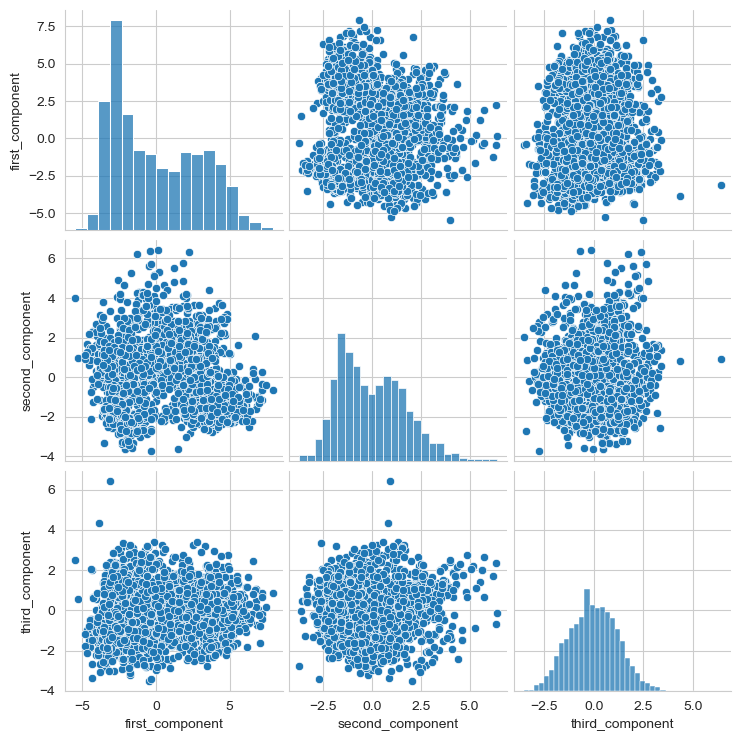

In [103]:
sns.pairplot(component_df);

# When we look at the distribution of our new components via pairplot,
# we can see that there is no significant relationship between them.

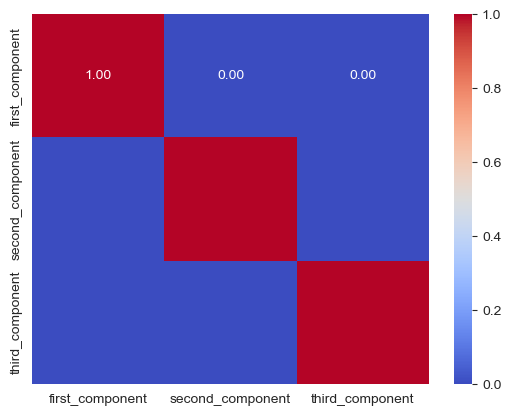

In [104]:
sns.heatmap(component_df.corr(), annot=True, fmt=".2f", cmap="coolwarm");

# Their correlations also 0.

In [105]:
pca.explained_variance_ratio_

# Shows how much of the information they carry on the whole data proportionally.

array([0.38869666, 0.13158672, 0.06848437])

In [106]:
pca.explained_variance_ratio_.cumsum()

# shows cumulative totals.

array([0.38869666, 0.52028338, 0.58876775])

Text(0, 0.5, 'Variance Ratio')

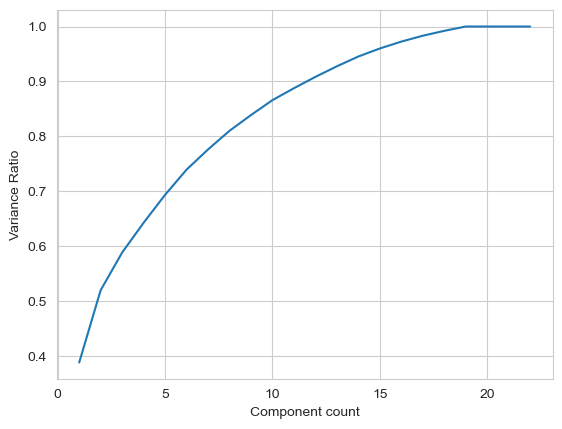

In [107]:
x = range(1,23)
pca = PCA().fit(scaled_df0)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......30
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

# Compenent number corresponding to the range of 75%-90% is preferred as best practice.
# However, for unsupervised models, if there are significant corr relationships between
# the features in your data, rates below 75%-90% can be tried and the results can be checked.
# For supervised models, if there are significant corr relationships between features or
# if you have very strong features, rates below 75%-90% can be tried and the results can be checked.

In [108]:
pca = PCA(n_components=22).fit(scaled_df0)

# Since the number of features in our data is less,
# the maximum number of components we can obtain cannot
# exceed the number of features in our data.
# For this reason, we set n_componenets= 23.

In [109]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [110]:
df_ev = pd.DataFrame(my_dict, index=range(1,23))
df_ev
# we can see the explained_variance, explained_variance_ratio and cumulative sums of each component on a single df.

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,8.56,0.39,0.39
2,2.90,0.13,0.52
3,1.51,0.07,0.59
4,1.19,0.05,0.64
5,1.12,0.05,0.69
6,1.01,0.05,0.74
7,0.81,0.04,0.78
8,0.75,0.03,0.81
9,0.63,0.03,0.84
10,0.60,0.03,0.87


In [111]:
df_ev.explained_variance.sum()
# The sum of explained_variance of all components is always equal to the total number of features.

22.009843400447423

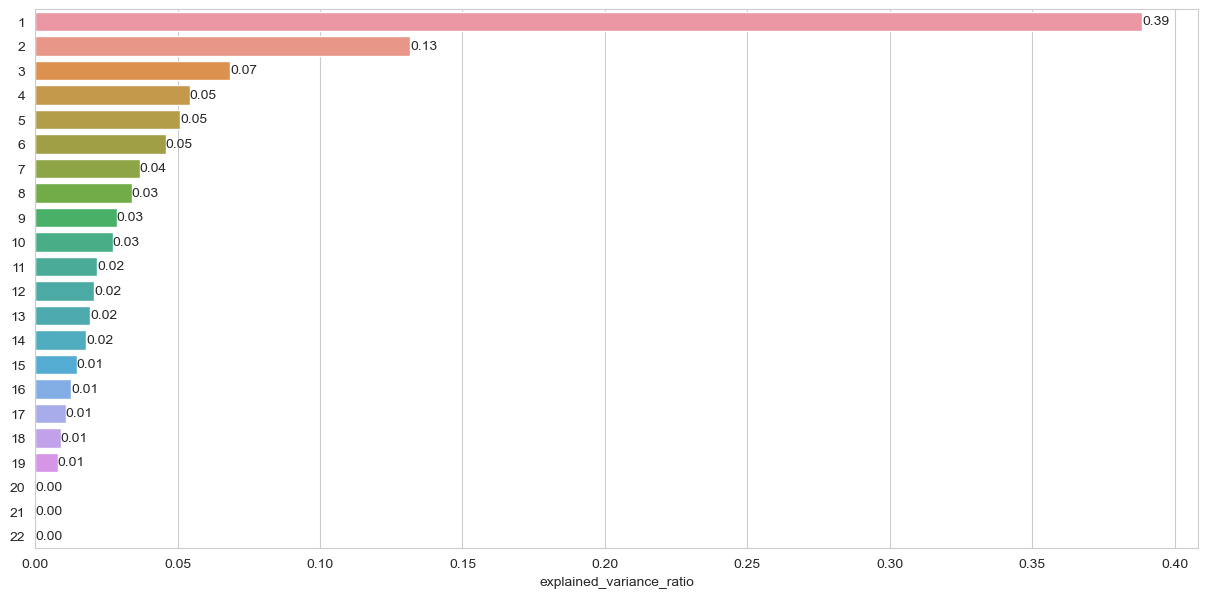

In [112]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clustering

### Create a new dataset with numeric features

In [113]:
numeric_df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,total_children,family_size,age,days_since_enrollment,total_acceptedcmp,spent,numtotalpurchases
0,58138,0,0,58,635,88,546,172,88,88,...,10,4,7,0,1,57,848,0,1617,25
1,46344,1,1,38,11,1,6,2,1,6,...,1,2,5,2,3,60,298,0,27,6
2,71613,0,0,26,426,49,127,111,21,42,...,2,10,4,0,2,49,497,0,776,21
3,26646,1,0,26,11,4,20,10,3,5,...,0,4,6,1,3,30,324,0,53,8
4,58293,1,0,94,173,43,118,46,27,15,...,3,6,5,1,3,33,346,0,422,19


In [114]:
scaler = StandardScaler()

X = scaler.fit_transform(numeric_df)

scaled_X = pd.DataFrame(X, columns=numeric_df.columns)

In [115]:
scaled_X.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,total_children,family_size,age,days_since_enrollment,total_acceptedcmp,spent,numtotalpurchases
0,0.29,-0.82,-0.93,0.31,0.98,1.55,1.68,2.46,1.48,0.85,...,2.51,-0.55,0.69,-1.26,-1.76,1.02,1.53,-0.44,1.68,1.32
1,-0.26,1.03,0.91,-0.38,-0.87,-0.64,-0.71,-0.65,-0.63,-0.73,...,-0.57,-1.17,-0.13,1.40,0.45,1.27,-1.19,-0.44,-0.96,-1.16
2,0.92,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,...,-0.23,1.29,-0.54,-1.26,-0.66,0.33,-0.21,-0.44,0.28,0.80
3,-1.18,1.03,-0.93,-0.80,-0.87,-0.56,-0.65,-0.50,-0.58,-0.75,...,-0.91,-0.55,0.28,0.07,0.45,-1.29,-1.06,-0.44,-0.92,-0.90
4,0.30,1.03,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,...,0.12,0.06,-0.13,0.07,0.45,-1.03,-0.95,-0.44,-0.31,0.54


In [116]:
scaled_X.shape

(2236, 22)

#### Hopkins test 

In [117]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [118]:
# hopkins : A statistical method that measures data clustering tendency.
# More than 0.5 is prone to clustering.

In [119]:
hopkins(scaled_X)

0.8567933292598802

In [120]:
hopkins(scaled_X,1)

0.8473909133866684

#### Determine optimal number of clusters

### inertia

In [121]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

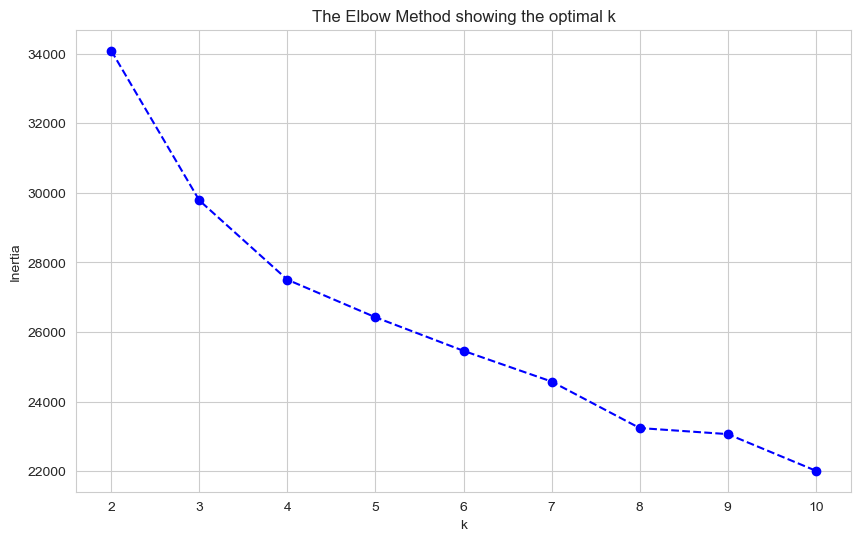

In [122]:
elbow_vis(scaled_X)

### distortion

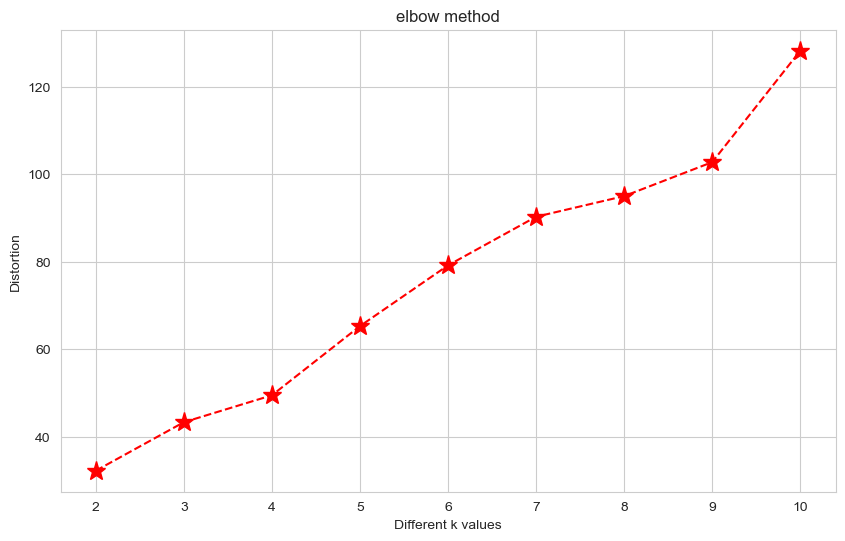

In [123]:
elbow_vis(scaled_X, inertia=False)

### silhoutte score

In [124]:
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [125]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(scaled_X)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29626323153417206
For n_clusters=3, the silhouette score is 0.22736413382020704
For n_clusters=4, the silhouette score is 0.16781174199966517
For n_clusters=5, the silhouette score is 0.15523042366964213
For n_clusters=6, the silhouette score is 0.15640438725890687
For n_clusters=7, the silhouette score is 0.15126102757351487
For n_clusters=8, the silhouette score is 0.15753852713066546
For n_clusters=9, the silhouette score is 0.12705820817068303


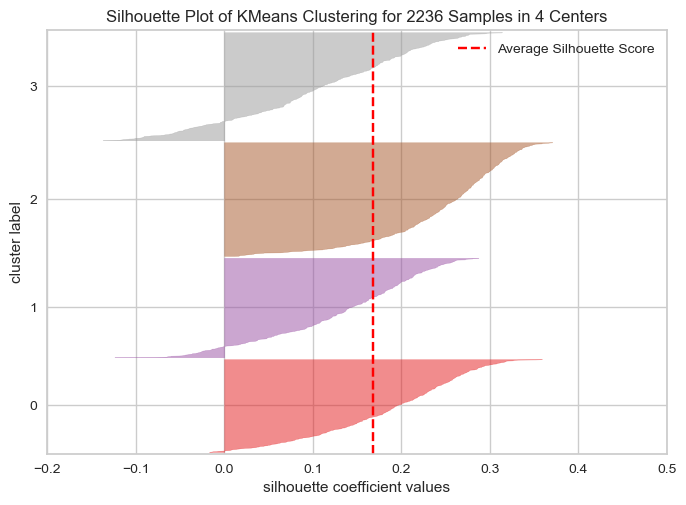

In [126]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=4!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_X)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

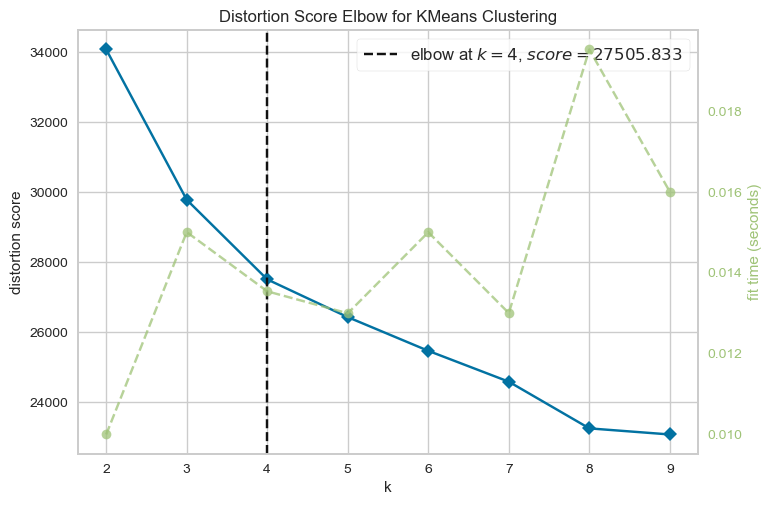

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(scaled_X)
visu.poof()

#### Apply K Means

In [128]:
K_means_model = KMeans(n_clusters = 4, random_state=42)
K_means_model.fit_predict(scaled_X)

array([1, 0, 1, ..., 1, 3, 0])

In [129]:
K_means_model.labels_

array([1, 0, 1, ..., 1, 3, 0])

In [130]:
clusters = K_means_model.labels_

In [131]:
numeric_df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,total_children,family_size,age,days_since_enrollment,total_acceptedcmp,spent,numtotalpurchases
0,58138,0,0,58,635,88,546,172,88,88,...,10,4,7,0,1,57,848,0,1617,25
1,46344,1,1,38,11,1,6,2,1,6,...,1,2,5,2,3,60,298,0,27,6
2,71613,0,0,26,426,49,127,111,21,42,...,2,10,4,0,2,49,497,0,776,21
3,26646,1,0,26,11,4,20,10,3,5,...,0,4,6,1,3,30,324,0,53,8
4,58293,1,0,94,173,43,118,46,27,15,...,3,6,5,1,3,33,346,0,422,19


In [132]:
numeric_df["predicted_clusters"] = clusters

In [133]:
numeric_df["response"] = target

In [134]:
numeric_df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,total_children,family_size,age,days_since_enrollment,total_acceptedcmp,spent,numtotalpurchases,predicted_clusters,response
0,58138,0,0,58,635,88,546,172,88,88,...,7,0,1,57,848,0,1617,25,1,1
1,46344,1,1,38,11,1,6,2,1,6,...,5,2,3,60,298,0,27,6,0,0
2,71613,0,0,26,426,49,127,111,21,42,...,4,0,2,49,497,0,776,21,1,0
3,26646,1,0,26,11,4,20,10,3,5,...,6,1,3,30,324,0,53,8,2,0
4,58293,1,0,94,173,43,118,46,27,15,...,5,1,3,33,346,0,422,19,3,0


#### Visualizing and Labeling All the Clusters

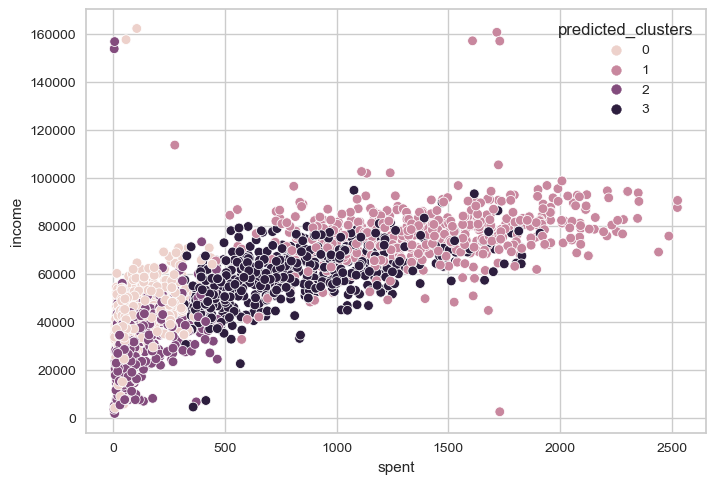

In [135]:
sns.scatterplot(data=numeric_df, x="spent", y="income", hue="predicted_clusters");

### Clustering based on selected features

#### Select features from existing data

#### Determine optimal number of clusters for selected features

#### Building the model based on the optimal number of clusters with selected features

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

### silhouette_score

### Clustering based on selected features

## Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___